In [1]:
pip install psycopg2


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk==3.3


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Corpus


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scattertext


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [8]:
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [1]:
import psycopg2
import bs4
from bs4 import BeautifulSoup as soup
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import spacy
import scattertext
nlp = spacy.load('en_core_web_sm')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize, RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re, io, itertools
from pprint import pprint
import numpy as np
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from PIL import Image  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "34.244.94.19",
    port = "5432",
    database = "dap_project")
    
    dbConnection.set_isolation_level(0)
    dbCursor = dbConnection.cursor()
    
    # connection of postgresql  
    print ( dbConnection.get_dsn_parameters(),"\n")

    # version of postgresql
    dbCursor.execute("SELECT version();")
    record = dbCursor.fetchone()
    print("Connection done - ", record,"\n")

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting", error)

{'user': 'dap', 'dbname': 'dap_project', 'host': '34.244.94.19', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

Connection done -  ('PostgreSQL 11.7 (Debian 11.7-0+deb10u1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 8.3.0-6) 8.3.0, 64-bit',) 



In [6]:
#Sentiment Analysis on Reviews of TV SHOWS

# SQL query for fetching the data
sql='''
select content from movies_reviews;
'''
dbCursor.execute(sql)
data1=dbCursor.fetchall()

In [7]:
# processesing the movies_review

sting_list= []
def review_to_words(review,string = True,remove_stopwords=True):
    
    #  non-letters were removed
    for val in range(len(data1)):
        str = data1[val][0]
        review_text = re.sub("[^a-zA-Z]"," ", str)
        
    # split of words by lowering the case
        words = review_text.lower().split()
        
    # removed stop words 
        if remove_stopwords:
            stops = set(stopwords.words("english"))
            words = [w for w in words if not w in stops]
        
        if string:
            final_str=" ".join(words)
            sting_list.append(final_str)
        else:
            return words
    return final_str
    
string = review_to_words(str)
#print(sting_list)

In [9]:
# printing list of words
analyzer = SentimentIntensityAnalyzer()
positive_list=[]
neutral_list=[]
negative_list=[]
tokenization_list =[]

for string in sting_list:
    tokenized_text = nltk.word_tokenize(string)
    tokenization_list.append(tokenized_text)

#tokenized_data = get_word_sentiment(string)

for i in tokenization_list:
    for word in i:
        if (analyzer.polarity_scores(word)['compound']) >= 0.1:
            positive_list.append(word)
        elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
            negative_list.append(word)
        else:
            neutral_list.append(word)
print('Positive:',positive_list)        
print('Neutral:',neutral_list)    
print('Negative:',negative_list)

Positive: ['paradise', 'romantic', 'comedies', 'romantic', 'retreat', 'best', 'friend', 'encouragement', 'vision', 'confidence', 'entertaining', 'charming', 'recommend', 'certainly', 'well', 'great', 'masterpiece', 'huge', 'thanks', 'clear', 'lovely', 'respectably', 'passionately', 'lovable', 'like', 'like', 'creations', 'admit', 'huge', 'lover', 'glory', 'magnificent', 'gorgeously', 'truly', 'masterpiece', 'enjoyed', 'fan', 'great', 'certainly', 'recommended', 'definitely', 'trust', 'fan', 'best', 'great', 'amusing', 'laugh', 'humor', 'credits', 'great', 'beauty', 'great', 'beauty', 'allow', 'beauty', 'like', 'playing', 'beauty', 'greater', 'beauty', 'prominent', 'beauty', 'romantic', 'beauty', 'beauty', 'beauty', 'beauty', 'thoughtfulness', 'value', 'beauty', 'greatest', 'agree', 'great', 'better', 'agree', 'greatest', 'great', 'love', 'daring', 'superb', 'breathtaking', 'great', 'amazing', 'great', 'greatest', 'best', 'great', 'brilliant', 'well', 'well', 'great', 'played', 'plays',

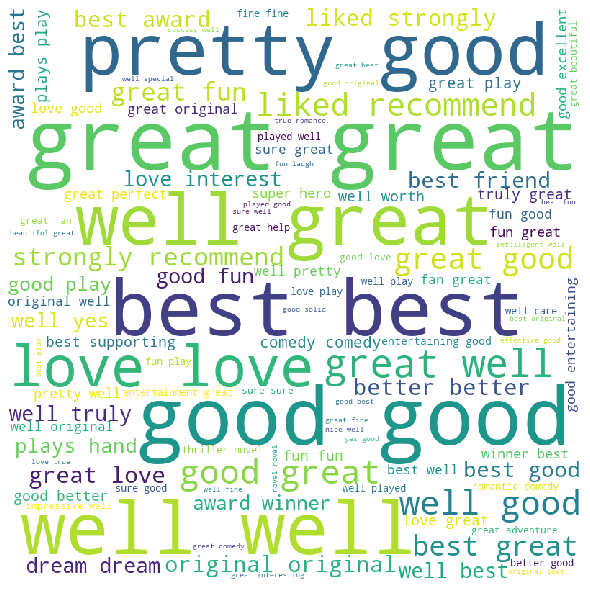

In [10]:
# fetching the data and printing positive words with wordcloud
sql = '''
select content from movies_reviews;
'''
data = pd.read_sql(sql, dbConnection)
df = pd.DataFrame(data)
df  
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.content: 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(positive_list)): 
        positive_list[i] = positive_list[i].lower() 
      
    comment_words += " ".join(positive_list)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

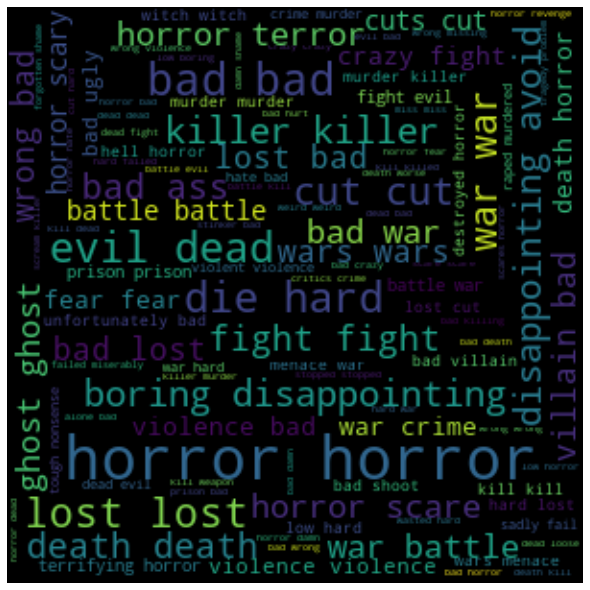

In [36]:
# fetching the data and printing negative words with wordcloud
sql = '''
select * from movies_reviews;
'''
data = pd.read_sql(sql, dbConnection)
df = pd.DataFrame(data)  
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.content: 
    
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(negative_list)): 
        negative_list[i] = negative_list[i].lower() 
      
    comment_words += " ".join(negative_list)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
wave_mask = np.array(Image.open("circle.png"))
wordcloud = WordCloud(mask=wave_mask).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.margins(x=0, y=0)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [30]:
#Sentiment Analysis on Reviews of TV SHOWS
sql1='''
select content from tv_reviews;
'''
dbCursor.execute(sql1)
data_tv=dbCursor.fetchall()

In [33]:
# processes a review 
string_list= []
string = True
remove_stopwords = True

for value in range(len(data_tv)):
    tv_review_text = data_tv[value][0]
    
    # remove non letters
    review_text = re.sub("[^a-zA-Z]"," ", tv_review_text)
    
    # Spliting the data and Converts each token into lowercase  
    words= review_text.lower().split()
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words= [w for w in words if not w in stops]
    if string:
        final_str=" ".join(words)
        string_list.append(final_str)
    else:
        print(words)

print(string_list)


['great show got everything great characters strong storylines many issues horror romance tragedy comedy coming age much', 'review show like doctor running long enjoying dizzying highs terrible lows looking twin dilemma concept open tardis show go anywhere lead huge range stories historical alien involvement like aztecs full sci fi like daleks first series show created memorable monsters daleks cybermen famous even outside recurring creatures fantastic adversaries like egyptian god bent destruction alien splintered time doctor also embraced change form regeneration actor playing doctor could change play part differently still doctor led changes approach problems attitude central character keeping core values doctor one heroes rarely resorts violence solve problems usually relying intelligence wits show also truly innovated many special effects tried first time screen always work working created truly memorable television like creating convincing lunar surface years moon landings moonba

In [34]:
# printing list of words
analyzer = SentimentIntensityAnalyzer()
positive_lists=[]
neutral_lists=[]
negative_lists=[]
tokenization_list =[]

for string in sting_list:
    tokenized_text = nltk.word_tokenize(string)
    tokenization_list.append(tokenized_text)

for i in tokenization_list:
    for word in i:
        if (analyzer.polarity_scores(word)['compound']) >= 0.1:
            positive_lists.append(word)
        elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
            negative_lists.append(word)
        else:
            neutral_list.append(word)
print('Positive:',positive_lists)        
print('Neutral:',neutral_lists)    
print('Negative:',negative_lists)

Positive: ['paradise', 'romantic', 'comedies', 'romantic', 'retreat', 'best', 'friend', 'encouragement', 'vision', 'confidence', 'entertaining', 'charming', 'recommend', 'certainly', 'well', 'great', 'masterpiece', 'huge', 'thanks', 'clear', 'lovely', 'respectably', 'passionately', 'lovable', 'like', 'like', 'creations', 'admit', 'huge', 'lover', 'glory', 'magnificent', 'gorgeously', 'truly', 'masterpiece', 'enjoyed', 'fan', 'great', 'certainly', 'recommended', 'definitely', 'trust', 'fan', 'best', 'great', 'amusing', 'laugh', 'humor', 'credits', 'great', 'beauty', 'great', 'beauty', 'allow', 'beauty', 'like', 'playing', 'beauty', 'greater', 'beauty', 'prominent', 'beauty', 'romantic', 'beauty', 'beauty', 'beauty', 'beauty', 'thoughtfulness', 'value', 'beauty', 'greatest', 'agree', 'great', 'better', 'agree', 'greatest', 'great', 'love', 'daring', 'superb', 'breathtaking', 'great', 'amazing', 'great', 'greatest', 'best', 'great', 'brilliant', 'well', 'well', 'great', 'played', 'plays',

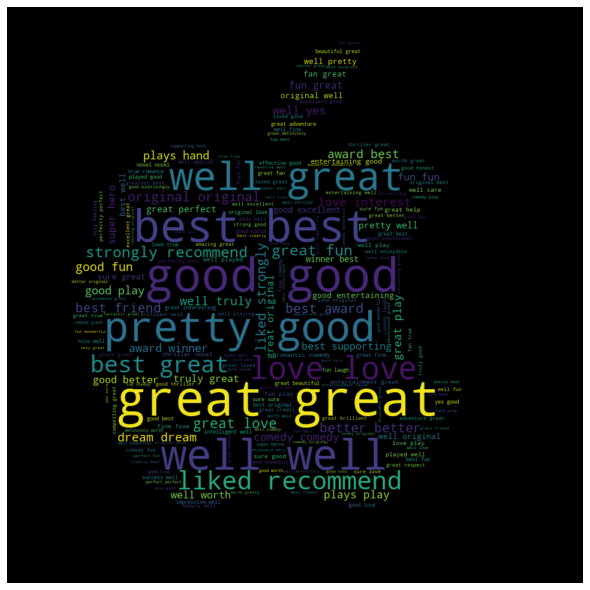

In [35]:
sql1 = '''
select content from tv_reviews;
'''
data_tv = pd.read_sql(sql1, dbConnection)
df = pd.DataFrame(data_tv)
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in df.content: 
   
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(positive_lists)): 
        positive_lists[i] = positive_lists[i].lower() 
      
    comment_words += " ".join(positive_lists)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

wave_mask = np.array(Image.open("apple.jpg"))
wordcloud = WordCloud(mask=wave_mask).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

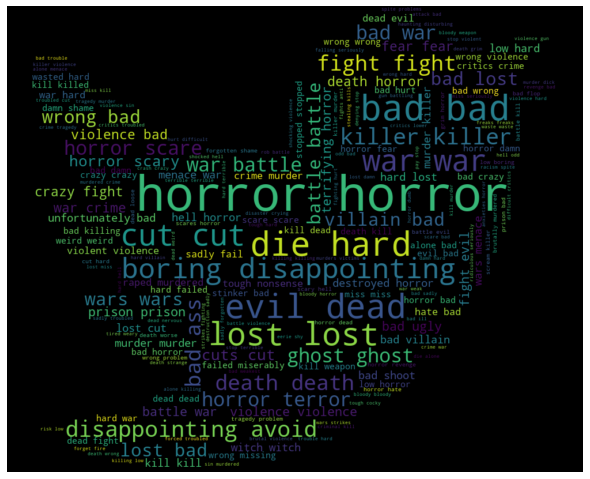

In [32]:
sql1 = '''
select content from tv_reviews;
'''
data_tv = pd.read_sql(sql1, dbConnection)
df = pd.DataFrame(data_tv)
comment_words = '' 
stopwords = set(STOPWORDS) 

pos_word_list = list(dict.fromkeys(neg_word_list))

for val in df.content: 
   
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(negative_list)): 
        negative_list[i] = negative_list[i].lower() 
      
    comment_words += " ".join(negative_list)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
wave_mask = np.array(Image.open("twitter.png"))
wordcloud = WordCloud(mask=wave_mask).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 